<a href="https://colab.research.google.com/github/AlanJack48/Credit-Card-Fraud-Detection/blob/main/Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
data=pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [36]:
data.shape

(196172, 31)

In [37]:
#Preprocessing
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [38]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object

In [39]:
#feature scaling

In [40]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [41]:
data.describe().round(2).style.background_gradient()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,196172.000000,196172.000000,196172.000000,196172.000000,196172.000000,196172.000000,196172.000000,196172.000000,196172.000000,196172.000000,196172.000000,196172.000000,196172.000000,196172.000000,196172.000000,196172.000000,196172.000000,196172.000000,196172.000000,196172.000000,196171.000000,196171.000000,196171.000000,196171.000000,196171.000000,196171.000000,196171.000000,196171.000000,196171.000000,196171.000000,196171.000000
mean,69440.150000,-0.110000,0.010000,0.340000,0.080000,-0.120000,0.050000,-0.050000,0.020000,0.010000,-0.010000,0.130000,-0.070000,0.040000,0.050000,0.090000,-0.010000,0.030000,-0.040000,-0.010000,0.020000,-0.020000,-0.050000,-0.020000,0.000000,0.060000,0.010000,0.000000,0.000000,89.640000,0.000000
std,33864.900000,1.890000,1.620000,1.440000,1.400000,1.360000,1.310000,1.220000,1.210000,1.140000,1.090000,1.040000,1.100000,1.030000,0.970000,0.950000,0.890000,0.890000,0.840000,0.820000,0.750000,0.740000,0.690000,0.610000,0.600000,0.490000,0.490000,0.390000,0.310000,248.820000,0.040000
min,0.000000,-56.410000,-72.720000,-33.680000,-5.680000,-42.150000,-26.160000,-43.560000,-73.220000,-13.430000,-24.590000,-4.800000,-18.680000,-5.790000,-19.210000,-4.500000,-14.130000,-25.160000,-9.500000,-7.210000,-25.220000,-34.830000,-10.930000,-44.810000,-2.840000,-10.300000,-2.600000,-22.570000,-11.710000,0.000000,0.000000
25%,43888.000000,-0.960000,-0.580000,-0.310000,-0.790000,-0.790000,-0.710000,-0.580000,-0.180000,-0.660000,-0.520000,-0.620000,-0.480000,-0.640000,-0.360000,-0.500000,-0.480000,-0.440000,-0.520000,-0.490000,-0.190000,-0.230000,-0.540000,-0.170000,-0.340000,-0.240000,-0.330000,-0.070000,-0.040000,5.990000,0.000000
50%,66512.000000,-0.100000,0.080000,0.510000,0.080000,-0.180000,-0.220000,-0.010000,0.040000,-0.070000,-0.100000,0.070000,0.110000,0.010000,0.080000,0.180000,0.060000,-0.030000,-0.040000,-0.010000,-0.040000,-0.040000,-0.040000,-0.030000,0.050000,0.110000,-0.060000,0.010000,0.020000,22.950000,0.000000
75%,88148.250000,1.210000,0.780000,1.230000,0.890000,0.460000,0.450000,0.500000,0.340000,0.630000,0.440000,0.920000,0.610000,0.710000,0.510000,0.780000,0.530000,0.420000,0.450000,0.470000,0.150000,0.150000,0.420000,0.110000,0.420000,0.390000,0.260000,0.090000,0.080000,79.080000,0.000000
max,131388.000000,2.450000,22.060000,9.380000,16.880000,34.800000,22.530000,36.680000,20.010000,15.590000,23.750000,12.020000,7.850000,4.570000,10.530000,5.780000,6.100000,9.250000,5.040000,5.590000,39.420000,27.200000,10.500000,19.000000,4.020000,7.520000,3.520000,12.150000,33.850000,19656.530000,1.000000


In [42]:
data.duplicated().sum()

709

In [43]:
#drop duplicates
data.drop_duplicates(inplace=True)

In [44]:
data['Class'].value_counts()

0.0    195098
1.0       364
Name: Class, dtype: int64

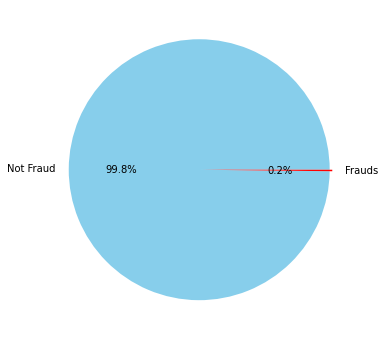

In [45]:
#Exploratory Data Analysis (EDA)
plt.figure(figsize=(10,6))
labels=['Not Fraud' , 'Frauds']
explode = [.01,.01]
color=['skyblue' , 'Red']
sizes=data.Class.value_counts().values

plt.pie(sizes,explode,labels,autopct="%1.1f%%", colors = color)
plt.show()

In [46]:
from pylab import rcParams
rcParams['figure.figsize']=15,6
RANDOM_SEED =151
LABELS=['Normal','Fraud']

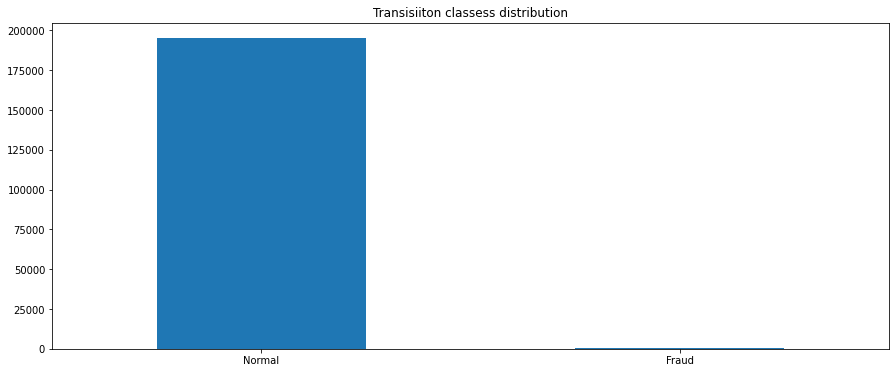

In [47]:
count_classes=pd.value_counts(data['Class'],sort=True)
count_classes.plot(kind='bar',rot=0)
plt.title('Transisiiton classess distribution')
plt.xticks(range(2),LABELS)
plt.show()

In [48]:
fraud=data[data['Class']==1]
normal=data[data['Class']==0]
print(fraud.shape , normal.shape)

(364, 31) (195098, 31)


In [49]:
fraud.Amount.describe()

count     364.000000
mean      119.628242
std       252.732454
min         0.000000
25%         1.000000
50%        12.310000
75%       104.225000
max      2125.870000
Name: Amount, dtype: float64

In [50]:
normal.Amount.describe()

count    195098.000000
mean         89.680964
std         249.071576
min           0.000000
25%           5.990000
50%          22.990000
75%          79.200000
max       19656.530000
Name: Amount, dtype: float64

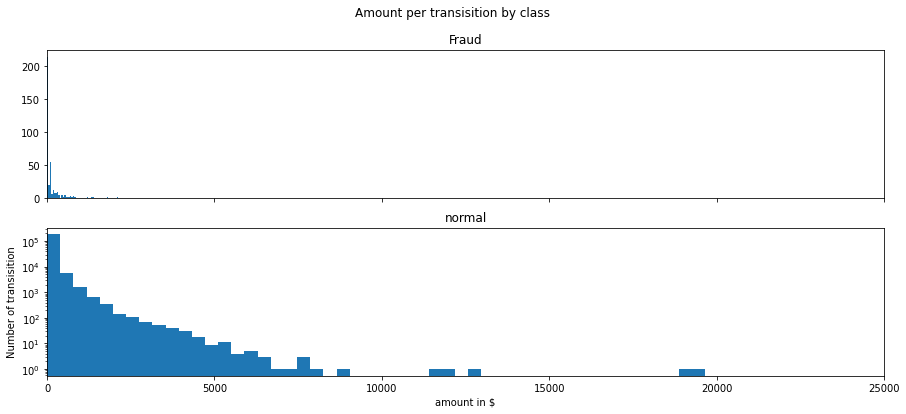

In [51]:
f,(ax1,ax2)=plt.subplots(2,1,sharex=True)
f.suptitle('Amount per transisition by class')
bins =50
ax1.hist(fraud.Amount , bins=bins)
ax1.set_title('Fraud')

ax2.hist(normal.Amount,bins=bins)
ax2.set_title('normal')

plt.xlabel('amount in $')
plt.ylabel('Number of transisition')

plt.xlim(0,25000)
plt.yscale('log')
plt.show()

Text(0.5, 1.0, 'normal')

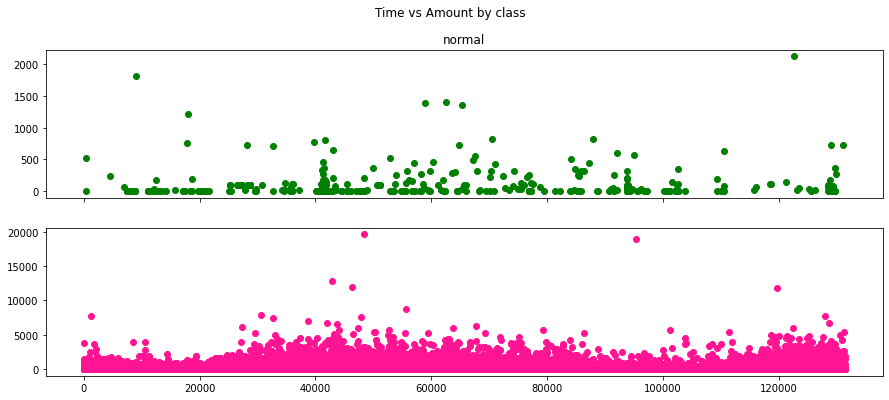

In [52]:
f , (ax1,ax2)=plt.subplots(2,1,sharex=True)
f.suptitle('Time vs Amount by class')

ax1.scatter(fraud.Time ,fraud.Amount,color = 'green')
ax1.set_title('Fraud')

ax2.scatter(normal.Time,normal.Amount,color = 'deeppink')
ax1.set_title('normal')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


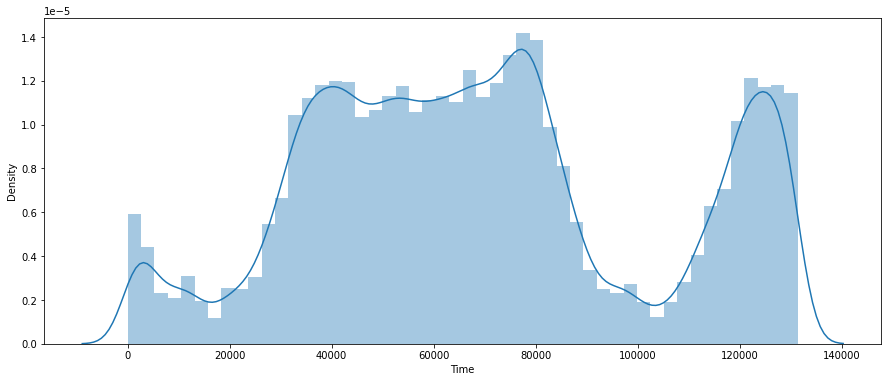

In [53]:
sns.distplot(data['Time'])
plt.show()


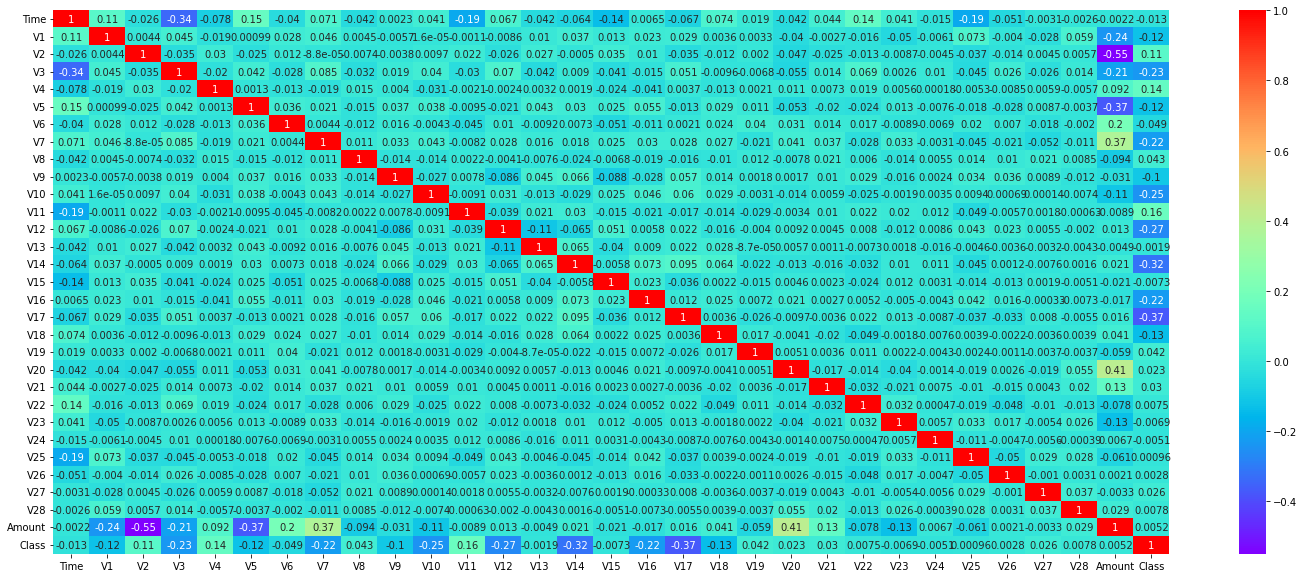

In [54]:
plt.figure(figsize=(25,10))
sns.heatmap(data.corr(),annot=True,cmap='rainbow')

In [55]:
#train and test data

In [56]:
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [61]:
from sklearn.model_selection import train_test_split
x_train , x_test ,y_train ,y_test =train_test_split(x,y,train_size=0.75,random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(146597, 30)
(48866, 30)
(146597,)
(48866,)


In [70]:
x_train = x_train.fillna(0)

In [71]:
x_train.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

In [68]:
y_train = y_train.fillna(0)

In [69]:
y_train.isnull().sum()

0

In [82]:
import warnings
warnings.filterwarnings('ignore')


In [83]:
#logistic_regression
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression()
logit.fit(x_train,y_train)

LogisticRegression()

In [84]:
y_pred_train =logit.predict(x_train)
y_pred_test=logit.predict(x_test)

In [85]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [86]:
print(confusion_matrix(y_train,y_pred_train))
print('********')
print(confusion_matrix(y_test,y_pred_test))

[[146238     72]
 [   110    177]]
********
[[48764    25]
 [   30    47]]


In [87]:
print(classification_report(y_train,y_pred_train))
print('********')
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    146310
         1.0       0.71      0.62      0.66       287

    accuracy                           1.00    146597
   macro avg       0.86      0.81      0.83    146597
weighted avg       1.00      1.00      1.00    146597

********
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     48789
         1.0       0.65      0.61      0.63        77

    accuracy                           1.00     48866
   macro avg       0.83      0.80      0.82     48866
weighted avg       1.00      1.00      1.00     48866



In [88]:
print(accuracy_score(y_train,y_pred_train))
print('********')
print(accuracy_score(y_test,y_pred_test))

0.9987585011971596
********
0.9988744730487455
